In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
#import graphviz
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
%matplotlib inline

In [2]:
films = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')

1. Завантажити дані, вивести на екран назви колонок і розмір датасета

In [3]:
display(films.head())

print(films.shape, "\n")
print(films.info(), "\n")
print(films.describe())

films.columns

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


(15480, 29) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   f

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

2. Опрацювати пропуски (по можливості заповнити їх або видалити)

In [4]:
films = films.dropna()
print(films.shape, "\n")

(2111, 29) 



3. Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
обмежитися декількома)

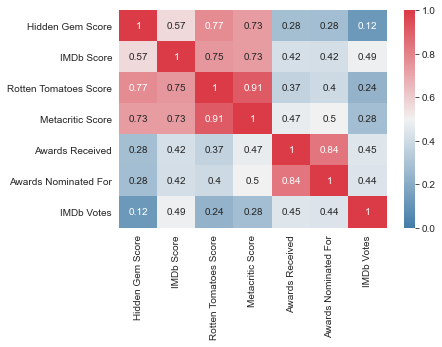

In [5]:
ax = sns.heatmap(films.corr(), vmin=0, vmax=1, cmap=sns.diverging_palette(240, 10, as_cmap=True), annot=True)
plt.show()

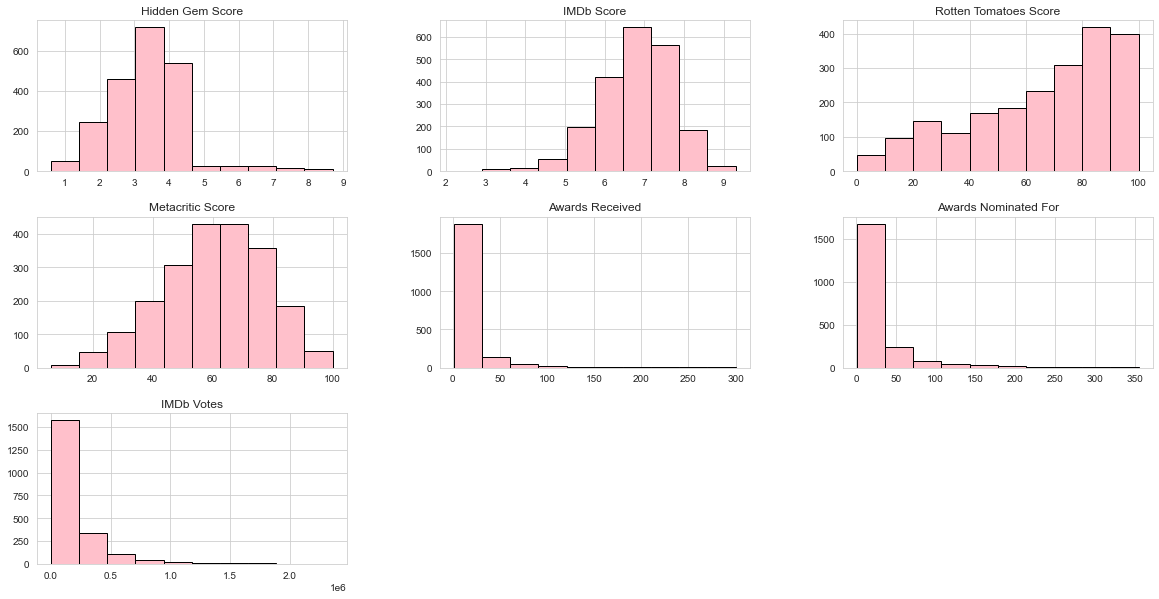

In [6]:
headers = ['Hidden Gem Score', 'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received', 'Awards Nominated For', 'IMDb Votes']
films.loc[:,headers].hist(color = "pink", figsize=(20,10), edgecolor='black', bins=10)
plt.show()

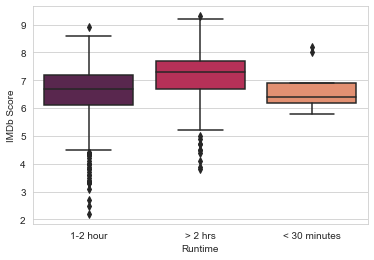

In [7]:
ax = sns.boxplot(x=films["Runtime"], y=films["IMDb Score"], palette = "rocket")
plt.rcParams['figure.figsize'] = [10, 5]

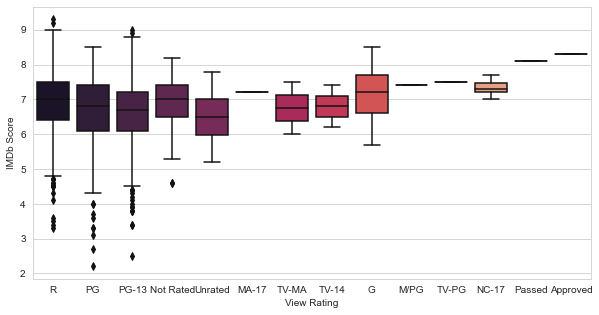

In [8]:
ax = sns.boxplot(x=films["View Rating"], y=films["IMDb Score"], palette = "rocket")
plt.rcParams['figure.figsize'] = [30, 10]

4. Нормалізувати дані

In [9]:
x = films[['Hidden Gem Score', 'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received', 'Awards Nominated For', 'IMDb Votes']]
normalized = preprocessing.normalize(x)
scaled_df = pd.DataFrame(normalized)
print(scaled_df)

             0         1         2         3         4         5         6
0     0.000004  0.000009  0.000071  0.000062  0.000118  0.000240  1.000000
1     0.000004  0.000009  0.000071  0.000070  0.000035  0.000094  1.000000
2     0.000006  0.000011  0.000125  0.000111  0.000060  0.000123  1.000000
3     0.000228  0.000420  0.005103  0.004322  0.000060  0.000060  0.999978
4     0.000089  0.000163  0.001883  0.001820  0.000402  0.000296  0.999996
...        ...       ...       ...       ...       ...       ...       ...
2106  0.000008  0.000021  0.000137  0.000146  0.000018  0.000030  1.000000
2107  0.000011  0.000030  0.000156  0.000208  0.000004  0.000022  1.000000
2108  0.000260  0.000589  0.005461  0.004508  0.000260  0.000433  0.999975
2109  0.000009  0.000022  0.000111  0.000201  0.000049  0.000098  1.000000
2110  0.000032  0.000130  0.000049  0.000539  0.000024  0.000024  1.000000

[2111 rows x 7 columns]


<h1>KNN</h1>

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_df, films['Awards Received'], random_state=0)

In [11]:
for i in range(1, 50):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, Y_train)
    prediction = clf.predict(X_test)
print(confusion_matrix(Y_test, prediction))
print('\n')
print(classification_report(Y_test, prediction))

[[101   8   5 ...   0   0   0]
 [ 70   8   5 ...   0   0   0]
 [ 33   6   4 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


              precision    recall  f1-score   support

         1.0       0.34      0.87      0.49       116
         2.0       0.19      0.10      0.13        84
         3.0       0.09      0.09      0.09        43
         4.0       0.10      0.05      0.07        38
         5.0       0.11      0.08      0.09        25
         6.0       0.00      0.00      0.00        22
         7.0       0.00      0.00      0.00         9
         8.0       0.11      0.11      0.11        18
         9.0       0.00      0.00      0.00        10
        10.0       0.00      0.00      0.00        11
        11.0       0.00      0.00      0.00         9
        12.0       0.00      0.00      0.00         6
        13.0       0.00      0.00      0.00         6
        14.0       0.00      0.00      0.00      

C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
n_neighbors = list(range(1,50))
hyperparameters = dict(n_neighbors=n_neighbors)#Create new KNN object
CV_knn = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=10)#Fit the model
CV_knn.fit(X_train, Y_train)#Print The value of best Hyperparameters

C:\Users\gress\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [16]:
CV_knn.best_params_

{'n_neighbors': 2}

In [17]:
CV_knn.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [18]:
grid_predictions = CV_knn.predict(X_test)
print(confusion_matrix(Y_test, grid_predictions))
print('\n')
print(classification_report(Y_test, grid_predictions))

[[73 23 15 ...  0  0  0]
 [50 25  4 ...  0  0  0]
 [13  9 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


              precision    recall  f1-score   support

         1.0       0.45      0.63      0.52       116
         2.0       0.34      0.30      0.32        84
         3.0       0.23      0.35      0.28        43
         4.0       0.12      0.13      0.13        38
         5.0       0.18      0.12      0.14        25
         6.0       0.18      0.09      0.12        22
         7.0       0.00      0.00      0.00         9
         8.0       0.00      0.00      0.00        18
         9.0       0.11      0.10      0.11        10
        10.0       0.12      0.09      0.11        11
        11.0       0.00      0.00      0.00         9
        12.0       0.00      0.00      0.00         6
        13.0       0.14      0.17      0.15         6
        14.0       0.00      0.00      0.00         3
        15.0       0.00      0.

C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_cla

<h1>Decision Tree</h1>

In [19]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
print(confusion_matrix(Y_test, prediction))
print('\n')
print(classification_report(Y_test, prediction))

[[111   2   3 ...   0   0   0]
 [ 19  37  28 ...   0   0   0]
 [  2   6  31 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


              precision    recall  f1-score   support

         1.0       0.79      0.96      0.86       116
         2.0       0.82      0.44      0.57        84
         3.0       0.19      0.72      0.31        43
         4.0       0.38      0.21      0.27        38
         5.0       0.20      0.04      0.07        25
         6.0       0.00      0.00      0.00        22
         7.0       0.00      0.00      0.00         9
         8.0       0.07      0.33      0.12        18
         9.0       0.00      0.00      0.00        10
        10.0       0.00      0.00      0.00        11
        11.0       0.00      0.00      0.00         9
        12.0       0.00      0.00      0.00         6
        13.0       0.00      0.00      0.00         6
        14.0       0.00      0.00      0.00      

C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [20]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= 0.00
|   |--- feature_1 <= 0.00
|   |   |--- feature_4 <= 0.00
|   |   |   |--- feature_1 <= 0.00
|   |   |   |   |--- feature_1 <= 0.00
|   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- feature_1 >  0.00
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- feature_1 >  0.00
|   |   |   |   |--- class: 1.0
|   |   |--- feature_4 >  0.00
|   |   |   |--- feature_1 <= 0.00
|   |   |   |   |--- feature_4 <= 0.00
|   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- feature_4 >  0.00
|   |   |   |   |   |--- class: 5.0
|   |   |   |--- feature_1 >  0.00
|   |   |   |   |--- feature_4 <= 0.00
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- feature_4 >  0.00
|   |   |   |   |   |--- class: 3.0
|   |--- feature_1 >  0.00
|   |   |--- feature_1 <= 0.00
|   |   |   |--- feature_4 <= 0.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_4 >  0.00
|   |   |   |   |--- feature_2 <= 0.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_2 

<h1>SVM</h1>

In [21]:
clf = SVC()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

In [22]:
print(confusion_matrix(Y_test, y_pred))
print('\n')
print(classification_report(Y_test, y_pred))

[[116   0   0 ...   0   0   0]
 [ 84   0   0 ...   0   0   0]
 [ 43   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]


              precision    recall  f1-score   support

         1.0       0.22      1.00      0.36       116
         2.0       0.00      0.00      0.00        84
         3.0       0.00      0.00      0.00        43
         4.0       0.00      0.00      0.00        38
         5.0       0.00      0.00      0.00        25
         6.0       0.00      0.00      0.00        22
         7.0       0.00      0.00      0.00         9
         8.0       0.00      0.00      0.00        18
         9.0       0.00      0.00      0.00        10
        10.0       0.00      0.00      0.00        11
        11.0       0.00      0.00      0.00         9
        12.0       0.00      0.00      0.00         6
        13.0       0.00      0.00      0.00         6
        14.0       0.00      0.00      0.00      

C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearch SVM

In [24]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
CV_svm = GridSearchCV(SVC(),param_grid, refit=True, verbose=3)
CV_svm.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\gress\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 3/5] END ...............

[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [25]:
CV_svm.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [26]:
CV_svm.best_estimator_

SVC(C=1000, gamma=1)

In [27]:
grid_predictions = CV_svm.predict(X_test)
print(confusion_matrix(Y_test, grid_predictions))
print('\n')
print(classification_report(Y_test, grid_predictions))

[[116   0   0 ...   0   0   0]
 [ 84   0   0 ...   0   0   0]
 [ 43   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]


              precision    recall  f1-score   support

         1.0       0.22      1.00      0.36       116
         2.0       0.00      0.00      0.00        84
         3.0       0.00      0.00      0.00        43
         4.0       0.00      0.00      0.00        38
         5.0       0.00      0.00      0.00        25
         6.0       0.00      0.00      0.00        22
         7.0       0.00      0.00      0.00         9
         8.0       0.00      0.00      0.00        18
         9.0       0.00      0.00      0.00        10
        10.0       0.00      0.00      0.00        11
        11.0       0.00      0.00      0.00         9
        12.0       0.00      0.00      0.00         6
        13.0       0.00      0.00      0.00         6
        14.0       0.00      0.00      0.00      

C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1>Random Forest</h1>

In [28]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

In [29]:
print(confusion_matrix(Y_test, y_pred))
print('\n')
print(classification_report(Y_test, y_pred))

[[116   0   0 ...   0   0   0]
 [ 84   0   0 ...   0   0   0]
 [ 43   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 [  0   0   1 ...   0   0   0]]


              precision    recall  f1-score   support

         1.0       0.26      1.00      0.41       116
         2.0       0.00      0.00      0.00        84
         3.0       0.00      0.00      0.00        43
         4.0       0.00      0.00      0.00        38
         5.0       0.00      0.00      0.00        25
         6.0       0.00      0.00      0.00        22
         7.0       0.00      0.00      0.00         9
         8.0       0.00      0.00      0.00        18
         9.0       0.00      0.00      0.00        10
        10.0       0.00      0.00      0.00        11
        11.0       0.00      0.00      0.00         9
        12.0       0.00      0.00      0.00         6
        13.0       0.00      0.00      0.00         6
        14.0       0.00      0.00      0.00      

C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearch RandomForest

In [32]:
param_grid = { 
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(RandomForestClassifier() , param_grid, n_jobs=-1)
CV_rfc.fit(X_train, Y_train)


C:\Users\gress\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8]})

In [34]:
CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [36]:
grid_predictions = CV_rfc.predict(X_test)
print(confusion_matrix(Y_test, grid_predictions))
print('\n')
print(classification_report(Y_test, grid_predictions))

[[114   1   1 ...   0   0   0]
 [ 18  55   9 ...   0   0   0]
 [  0  13  26 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


              precision    recall  f1-score   support

         1.0       0.84      0.98      0.91       116
         2.0       0.73      0.65      0.69        84
         3.0       0.37      0.60      0.46        43
         4.0       0.37      0.29      0.32        38
         5.0       0.23      0.24      0.24        25
         6.0       0.17      0.09      0.12        22
         7.0       0.00      0.00      0.00         9
         8.0       0.16      0.17      0.16        18
         9.0       0.00      0.00      0.00        10
        10.0       0.29      0.18      0.22        11
        11.0       0.00      0.00      0.00         9
        12.0       0.00      0.00      0.00         6
        13.0       1.00      0.17      0.29         6
        14.0       0.00      0.00      0.00      

C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_cla

<h1>AdaBoost</h1>

In [18]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

In [19]:
print(confusion_matrix(Y_test, y_pred))
print('\n')
print(classification_report(Y_test, y_pred))

[[ 3 16  1 ...  0  0  0]
 [ 0 11  2 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 ...
 [ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]]


              precision    recall  f1-score   support

         1.0       1.00      0.03      0.05       116
         2.0       0.07      0.13      0.09        84
         3.0       0.00      0.00      0.00        43
         4.0       0.01      0.03      0.01        38
         5.0       0.00      0.00      0.00        25
         6.0       0.00      0.00      0.00        22
         7.0       0.02      0.33      0.03         9
         8.0       0.00      0.00      0.00        18
         9.0       0.00      0.00      0.00        10
        10.0       0.00      0.00      0.00        11
        11.0       0.00      0.00      0.00         9
        12.0       0.00      0.00      0.00         6
        13.0       0.00      0.00      0.00         6
        14.0       0.00      0.00      0.00         3
        15.0       0.00      0.

C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_cla

GridSearch AdaBoost

In [39]:
param_grid = {
 'n_estimators': [10, 20, 30, 40, 50],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 }
CV_ab = GridSearchCV(AdaBoostClassifier(), param_grid, n_jobs=-1)
CV_ab.fit(X_train, Y_train)

C:\Users\gress\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [40]:
CV_ab.best_params_

{'learning_rate': 0.01, 'n_estimators': 20}

In [41]:
grid_predictions = CV_ab.predict(X_test)
print(confusion_matrix(Y_test, grid_predictions))
print('\n')
print(classification_report(Y_test, grid_predictions))

[[116   0   0 ...   0   0   0]
 [ 67   0  17 ...   0   0   0]
 [ 29   0  14 ...   0   0   0]
 ...
 [  0   0   1 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 [  0   0   1 ...   0   0   0]]


              precision    recall  f1-score   support

         1.0       0.32      1.00      0.49       116
         2.0       0.00      0.00      0.00        84
         3.0       0.08      0.33      0.13        43
         4.0       0.00      0.00      0.00        38
         5.0       0.00      0.00      0.00        25
         6.0       0.00      0.00      0.00        22
         7.0       0.00      0.00      0.00         9
         8.0       0.00      0.00      0.00        18
         9.0       0.00      0.00      0.00        10
        10.0       0.00      0.00      0.00        11
        11.0       0.00      0.00      0.00         9
        12.0       0.00      0.00      0.00         6
        13.0       0.00      0.00      0.00         6
        14.0       0.00      0.00      0.00      

C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gress\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
